In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')



pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('Sales_Data_Analysis.csv')

In [3]:
df.head()

Column1  Order ID       Product Category               Product  \
0        0    295665  Laptops and Computers    Macbook Pro Laptop   
1        1    295666        Home Appliances    LG Washing Machine   
2        2    295667        Charging Cables  USB-C Charging Cable   
3        3    295668               Monitors      27in FHD Monitor   
4        4    295669        Charging Cables  USB-C Charging Cable   

   Quantity Ordered  Price Each        Order Date  \
0                 1     1700.00  30-12-2019 00:01   
1                 1      600.00  29-12-2019 07:03   
2                 1       11.95  12-12-2019 18:21   
3                 1      149.99  22-12-2019 15:13   
4                 1       11.95  18-12-2019 12:38   

                         Purchase Address  Month    Sales            City  \
0  136 Church St, New York City, NY 10001     12  1700.00   New York City   
1     562 2nd St, New York City, NY 10001     12   600.00   New York City   
2    277 Main St, New York City, NY 10001     12    11.95   New York City   
3     410 6th St, San Francisco, CA 94016     12   149.99   San Francisco   
4           43 Hill St, Atlanta, GA 30301     12    11.95         Atlanta   

   Hour Time of Day  
0     0       Night  
1     7     Morning  
2    18     Evening  
3    15   Afternoon  
4    12   Afternoon

In [4]:
df.shape

(185950, 13)

In [5]:
df.sample(5)

Column1  Order ID       Product Category                   Product  \
45024      1752    152173               Batterie    AAA Batteries (4-pack)   
178502     6145    215758  Entertainment Devices             Flatscreen TV   
77813      7426    243778               Batterie    AAA Batteries (4-pack)   
6335       6367    301737  Laptops and Computers           ThinkPad Laptop   
131648    15206    273871          Audio Devices  Apple Airpods Headphones   

        Quantity Ordered  Price Each        Order Date  \
45024                  1        2.99  25-02-2019 10:55   
178502                 1      300.00  30-06-2019 21:34   
77813                  1        2.99  04-08-2019 05:16   
6335                   1      999.99  02-12-2019 15:11   
131648                 1      150.00  02-10-2019 02:47   

                              Purchase Address  Month   Sales            City  \
45024            962 7th St, Atlanta, GA 30301      2    2.99         Atlanta   
178502    808 14th St, New York City, NY 10001      6  300.00   New York City   
77813     626 Hill St, San Francisco, CA 94016      8    2.99   San Francisco   
6335    177 Willow St, San Francisco, CA 94016     12  999.99   San Francisco   
131648    76 South St, San Francisco, CA 94016     10  150.00   San Francisco   

        Hour Time of Day  
45024     10     Morning  
178502    21     Evening  
77813      5       Night  
6335      15   Afternoon  
131648     2       Night

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Column1           185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product Category  185950 non-null  object 
 3   Product           185950 non-null  object 
 4   Quantity Ordered  185950 non-null  int64  
 5   Price Each        185950 non-null  float64
 6   Order Date        185950 non-null  object 
 7   Purchase Address  185950 non-null  object 
 8   Month             185950 non-null  int64  
 9   Sales             185950 non-null  float64
 10  City              185950 non-null  object 
 11  Hour              185950 non-null  int64  
 12  Time of Day       185950 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 18.4+ MB


In [7]:
df.columns

Index(['Column1', 'Order ID', 'Product Category', 'Product',
       'Quantity Ordered', 'Price Each', 'Order Date', 'Purchase Address',
       'Month', 'Sales', 'City', 'Hour', 'Time of Day'],
      dtype='object')

In [8]:
df.count()

Column1             185950
Order ID            185950
Product Category    185950
Product             185950
Quantity Ordered    185950
Price Each          185950
Order Date          185950
Purchase Address    185950
Month               185950
Sales               185950
City                185950
Hour                185950
Time of Day         185950
dtype: int64

In [9]:
df.drop(['Column1'], axis = 1, inplace=True)

In [10]:
df.head()

Order ID       Product Category               Product  Quantity Ordered  \
0    295665  Laptops and Computers    Macbook Pro Laptop                 1   
1    295666        Home Appliances    LG Washing Machine                 1   
2    295667        Charging Cables  USB-C Charging Cable                 1   
3    295668               Monitors      27in FHD Monitor                 1   
4    295669        Charging Cables  USB-C Charging Cable                 1   

   Price Each        Order Date                        Purchase Address  \
0     1700.00  30-12-2019 00:01  136 Church St, New York City, NY 10001   
1      600.00  29-12-2019 07:03     562 2nd St, New York City, NY 10001   
2       11.95  12-12-2019 18:21    277 Main St, New York City, NY 10001   
3      149.99  22-12-2019 15:13     410 6th St, San Francisco, CA 94016   
4       11.95  18-12-2019 12:38           43 Hill St, Atlanta, GA 30301   

   Month    Sales            City  Hour Time of Day  
0     12  1700.00   New York City     0       Night  
1     12   600.00   New York City     7     Morning  
2     12    11.95   New York City    18     Evening  
3     12   149.99   San Francisco    15   Afternoon  
4     12    11.95         Atlanta    12   Afternoon

In [11]:
df.describe()

Order ID  Quantity Ordered     Price Each          Month  \
count  185950.000000     185950.000000  185950.000000  185950.000000   
mean   230417.569379          1.124383     184.399735       7.059140   
std     51512.737110          0.442793     332.731330       3.502996   
min    141234.000000          1.000000       2.990000       1.000000   
25%    185831.250000          1.000000      11.950000       4.000000   
50%    230367.500000          1.000000      14.950000       7.000000   
75%    275035.750000          1.000000     150.000000      10.000000   
max    319670.000000          9.000000    1700.000000      12.000000   

               Sales           Hour  
count  185950.000000  185950.000000  
mean      185.490917      14.413305  
std       332.919771       5.423416  
min         2.990000       0.000000  
25%        11.950000      11.000000  
50%        14.950000      15.000000  
75%       150.000000      19.000000  
max      3400.000000      23.000000

In [12]:
df.shape

(185950, 12)

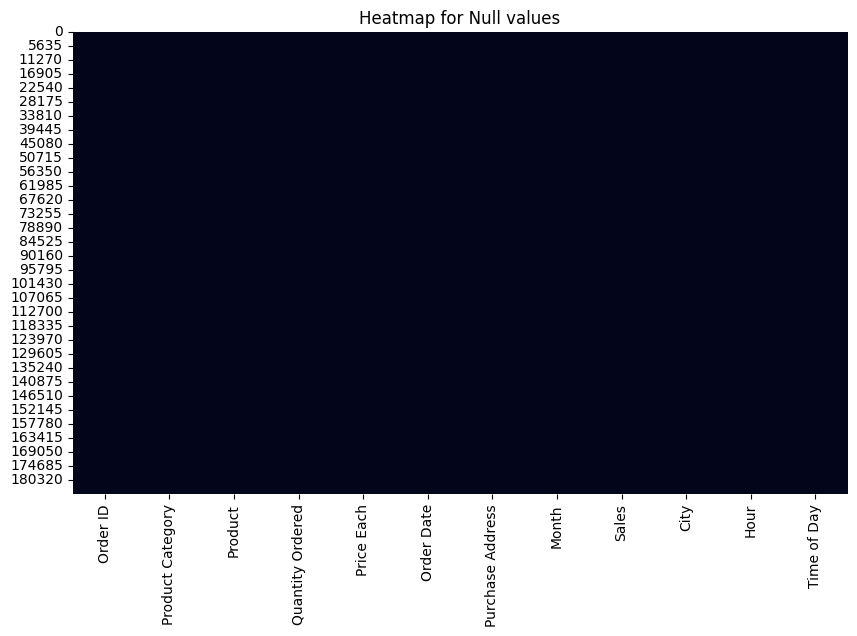

In [13]:
# Check missing values in dataset by heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),cbar=False)
plt.title('Heatmap for Null values')
plt.show()

In [14]:
df.isnull().sum()

Order ID            0
Product Category    0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
Time of Day         0
dtype: int64

In [15]:
# check duplicate values in dataset
df.duplicated().sum()

264

In [16]:
# See the Duplilcated values
df_cleaned = df[df.duplicated()]
df_cleaned.columns

Index(['Order ID', 'Product Category', 'Product', 'Quantity Ordered',
       'Price Each', 'Order Date', 'Purchase Address', 'Month', 'Sales',
       'City', 'Hour', 'Time of Day'],
      dtype='object')

In [17]:
# group by all columns except those to be aggregated
columns_to_group_by = ['Product Category', 'Product', 'Order Date', 'Purchase Address', 'Month', 'City', 'Hour', 'Time of Day']


# Aggregae the duplicated rows by summing 'Quantity ordered' and 'sales'
df_aggregated = df.groupby(columns_to_group_by).agg({
    'Quantity Ordered': 'sum',
    'Sales' : 'sum',
    'Price Each' : 'first' # or mean if needed
}).reset_index()

df_aggregated.to_csv('cleaned_dataset.csv', index=False)

print('Duplicates handled and cleaned dataset saved.')

Duplicates handled and cleaned dataset saved.


In [18]:
# Convert Order data dtype into datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  int64         
 1   Product Category  185950 non-null  object        
 2   Product           185950 non-null  object        
 3   Quantity Ordered  185950 non-null  int64         
 4   Price Each        185950 non-null  float64       
 5   Order Date        185950 non-null  datetime64[ns]
 6   Purchase Address  185950 non-null  object        
 7   Month             185950 non-null  int64         
 8   Sales             185950 non-null  float64       
 9   City              185950 non-null  object        
 10  Hour              185950 non-null  int64         
 11  Time of Day       185950 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 17.0+ MB


# Exploratory Data Analysis




### Univariate Analysis


Univariate analysis involves analyzing the distribution of individual columns.

1. **Descriptive Statistics**: Summary statistics for each column.
2. **Distribution Plots**: Histograms or count plots for each column.

In [20]:
# df.select_dtypes(include=['int64','float64'])

df_sample = df.sample(n=1000)  # Adjust the sample size as needed
df_sample.select_dtypes(include=['int64', 'float64'])

Order ID  Quantity Ordered  Price Each  Month    Sales  Hour
82095     247887                 1      379.99      8   379.99    13
77419     243404                 1        2.99      8     2.99    12
118628    261389                 1      300.00     10   300.00    12
126733    269163                 1       14.95     10    14.95    19
140847    145096                 1       11.95      1    11.95     8
112614    291932                 1      300.00     11   300.00    17
115123    294334                 1       11.99     11    11.99    12
41698     192587                 1       11.99      4    11.99    22
183293    220365                 1       11.95      6    11.95    18
45774     152896                 1      400.00      2   400.00    16
94582     205761                 1        2.99      5     2.99    16
24651     319342                 1      109.99     12   109.99    16
90403     201761                 1       14.95      5    14.95     7
33191     184428                 1      379.99      4   379.99    13
13358     308482                 1      700.00     12   700.00    19
245       295893                 1        2.99     12     2.99    23
152345    253807                 1        3.84      9     3.84     7
119187    261922                 2        3.84     10     7.68    14
180148    217350                 1        2.99      6     2.99    11
129263    271591                 1      300.00     10   300.00    17
6876      302261                 1      150.00     12   150.00    23
105044    284668                 1      389.99     11   389.99    20
142128    146328                 2        2.99      1     5.98    20
64876     171232                 1      149.99      3   149.99    16
19050     313955                 1       14.95     12    14.95    17
55162     161913                 1       11.95      2    11.95     1
171089    235415                 1     1700.00      7  1700.00     4
94735     205902                 1      400.00      5   400.00     0
156814    258121                 1       99.99      9    99.99     9
162360    227007                 1      149.99      7   149.99    23
88176     199635                 1        3.84      5     3.84    19
52308     159164                 1      600.00      2   600.00    18
92505     203759                 1      389.99      5   389.99    14
168883    233286                 1       14.95      7    14.95    20
31166     182490                 1       14.95      4    14.95    13
36793     187881                 1      999.99      4   999.99    17
121149    263799                 1       11.99     10    11.99    22
86682     198201                 2        3.84      5     7.68     1
117281    260095                 1       11.95     10    11.95     7
74263     240380                 1       11.99      8    11.99    16
36818     187905                 1       11.95      4    11.95    18
682       296317                 1        3.84     12     3.84    10
117775    260568                 1      109.99     10   109.99    20
103483    283181                 1      600.00     11   600.00    14
107553    287078                 1       11.99     11    11.99    16
23147     317892                 2        2.99     12     5.98    13
153928    255318                 1     1700.00      9  1700.00    11
133750    275878                 2       14.95     10    29.90    10
176345    213697                 1      700.00      6   700.00     0
54374     161159                 1       99.99      2    99.99     1
106491    286067                 1       99.99     11    99.99    19
14385     309469                 1       99.99     12    99.99    19
147609    249246                 1     1700.00      9  1700.00    15
168164    232598                 1      379.99      7   379.99     8
70783     237027                 1      150.00      8   150.00    19
125909    268367                 1        2.99     10     2.99    23
159781    224534                 1       14.95      7    14.95    20
108048

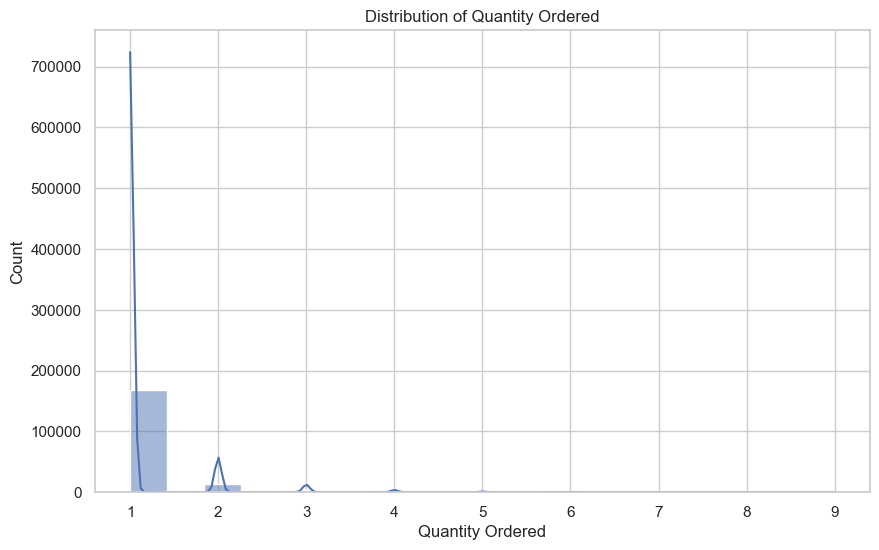

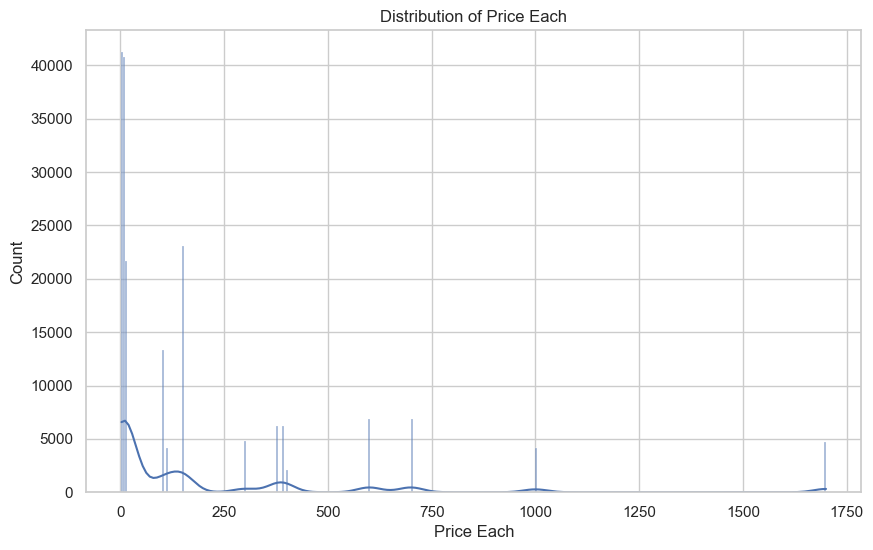

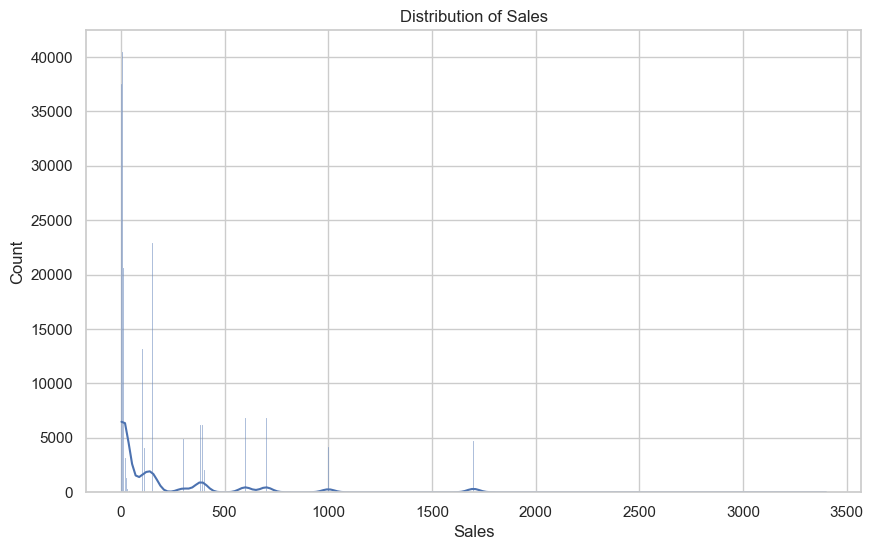

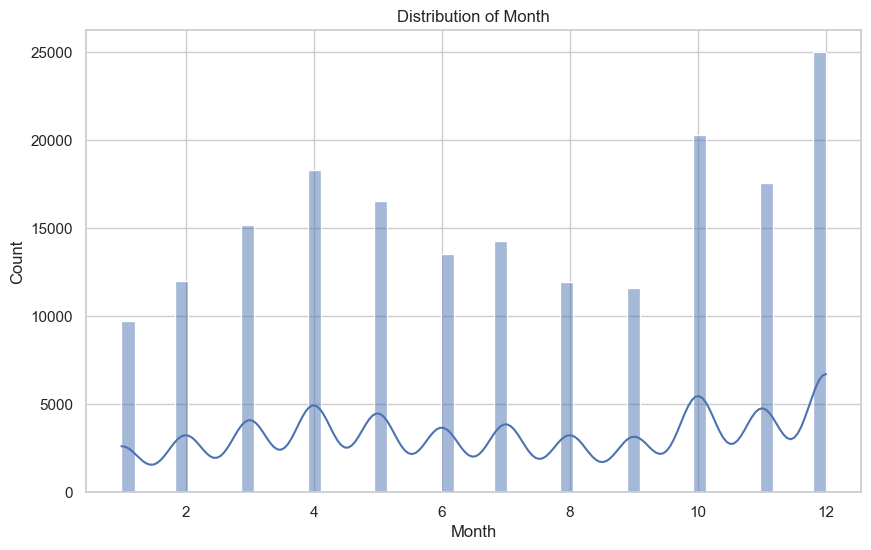

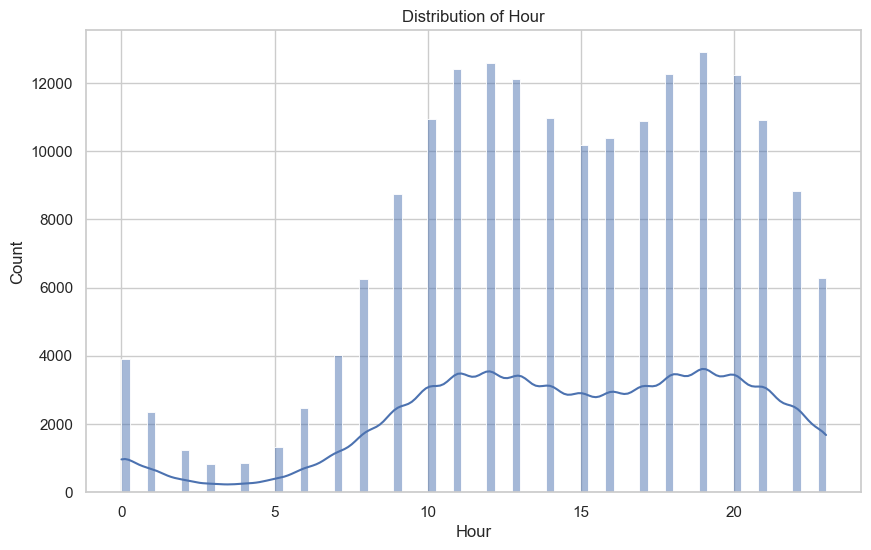

In [21]:
# Plotting settings
sns.set(style="whitegrid")

# Distribution plots for numerical columns
numerical_columns = ['Quantity Ordered','Price Each', 'Sales', 'Month', 'Hour']
for column in numerical_columns:
    plt.figure(figsize=(10,6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

In [22]:
df_sample.select_dtypes(include=['object'])

Product Category                     Product  \
82095                 Monitors      34in Ultrawide Monitor   
77419                 Batterie      AAA Batteries (4-pack)   
118628   Entertainment Devices               Flatscreen TV   
126733         Charging Cables    Lightning Charging Cable   
140847         Charging Cables        USB-C Charging Cable   
112614   Entertainment Devices               Flatscreen TV   
115123           Audio Devices            Wired Headphones   
41698            Audio Devices            Wired Headphones   
183293         Charging Cables        USB-C Charging Cable   
45774   Phones and Accessories             Vareebadd Phone   
94582                 Batterie      AAA Batteries (4-pack)   
24651                 Monitors                20in Monitor   
90403          Charging Cables    Lightning Charging Cable   
33191                 Monitors      34in Ultrawide Monitor   
13358   Phones and Accessories                      iPhone   
245                   Batterie      AAA Batteries (4-pack)   
152345                Batterie       AA Batteries (4-pack)   
119187                Batterie       AA Batteries (4-pack)   
180148                Batterie      AAA Batteries (4-pack)   
129263   Entertainment Devices               Flatscreen TV   
6876             Audio Devices    Apple Airpods Headphones   
105044                Monitors      27in 4K Gaming Monitor   
142128                Batterie      AAA Batteries (4-pack)   
64876                 Monitors            27in FHD Monitor   
19050          Charging Cables    Lightning Charging Cable   
55162          Charging Cables        USB-C Charging Cable   
171089   Laptops and Computers          Macbook Pro Laptop   
94735   Phones and Accessories             Vareebadd Phone   
156814           Audio Devices  Bose SoundSport Headphones   
162360                Monitors            27in FHD Monitor   
88176                 Batterie       AA Batteries (4-pack)   
52308          Home Appliances          LG Washing Machine   
92505                 Monitors      27in 4K Gaming Monitor   
168883         Charging Cables    Lightning Charging Cable   
31166          Charging Cables    Lightning Charging Cable   
36793    Laptops and Computers             ThinkPad Laptop   
121149           Audio Devices            Wired Headphones   
86682                 Batterie       AA Batteries (4-pack)   
117281         Charging Cables        USB-C Charging Cable   
74263            Audio Devices            Wired Headphones   
36818          Charging Cables        USB-C Charging Cable   
682                   Batterie       AA Batteries (4-pack)   
117775                Monitors                20in Monitor   
103483  Phones and Accessories                Google Phone   
107553           Audio Devices            Wired Headphones   
23147                 Batterie      AAA Batteries (4-pack)   
153928   Laptops and Computers          Macbook Pro Laptop   
133750         Charging Cables    Lightning Charging Cable   
176345  Phones and Accessories                      iPhone   
54374            Audio Devices  Bose SoundSport Headphones   
106491           Audio Devices  Bose SoundSport Headphones   
14385            Audio Devices  Bose SoundSport Headphones   
147609   Laptops and Computers          Macbook Pro Laptop   
168164                Monitors      34in Ultrawide Monitor   
70783            Audio Devices    Apple Airpods Headphones   
125909                Batterie      AAA Batteries (4-pack)   
159781         Charging Cables    Lightning Charging Cable   
108048         Charging Cables    Lightning Charging Cable   
29435          Charging Cables        USB-C Charging Cable   
134511                Monitors      27in 4K Gaming Monitor   
24872                 Monitors            27in FHD Monitor   
160323         Charging Cables    Lightning Charging Cable   
108708                Monitors      27in 4K Gaming Monitor   
12525          Charging Cables    Lightning Ch

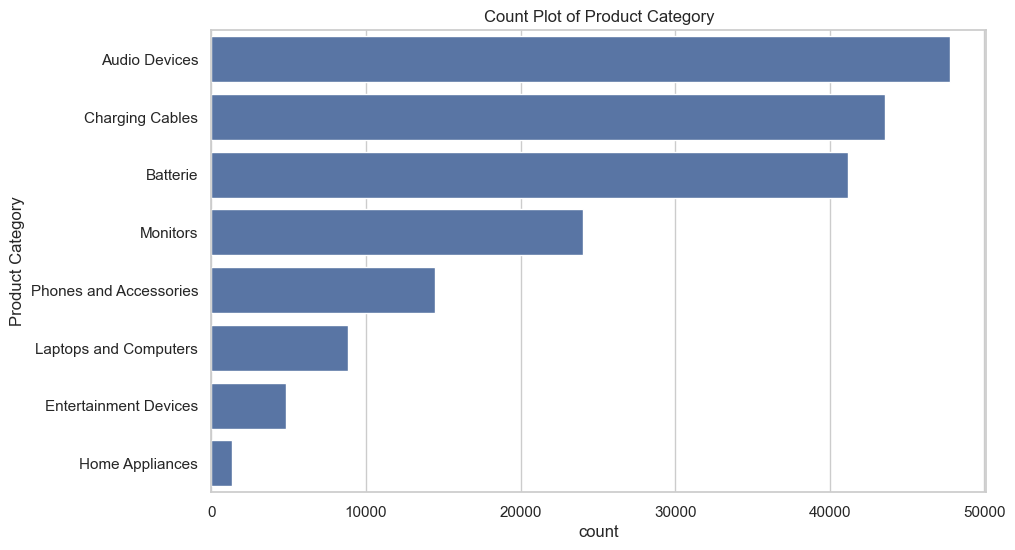

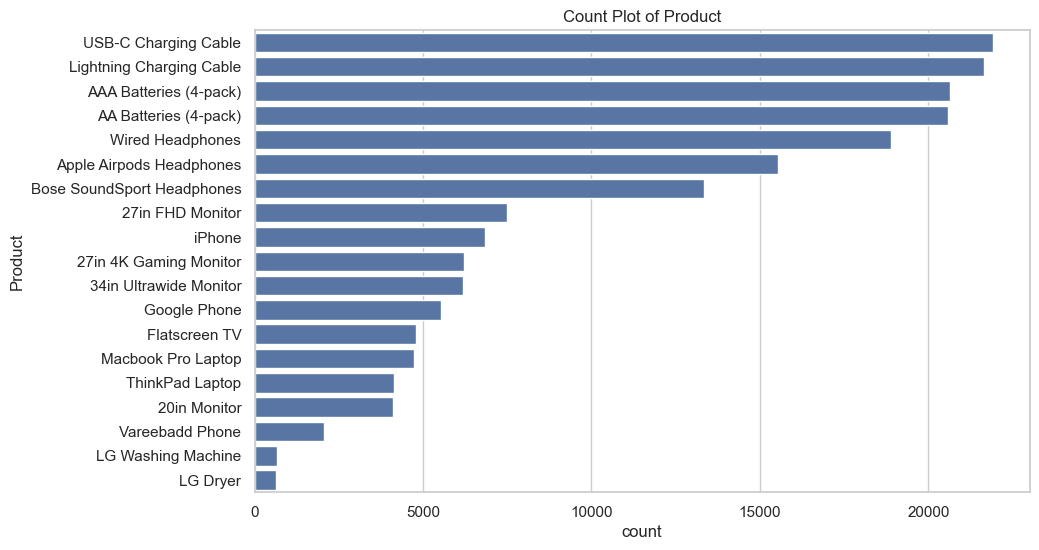

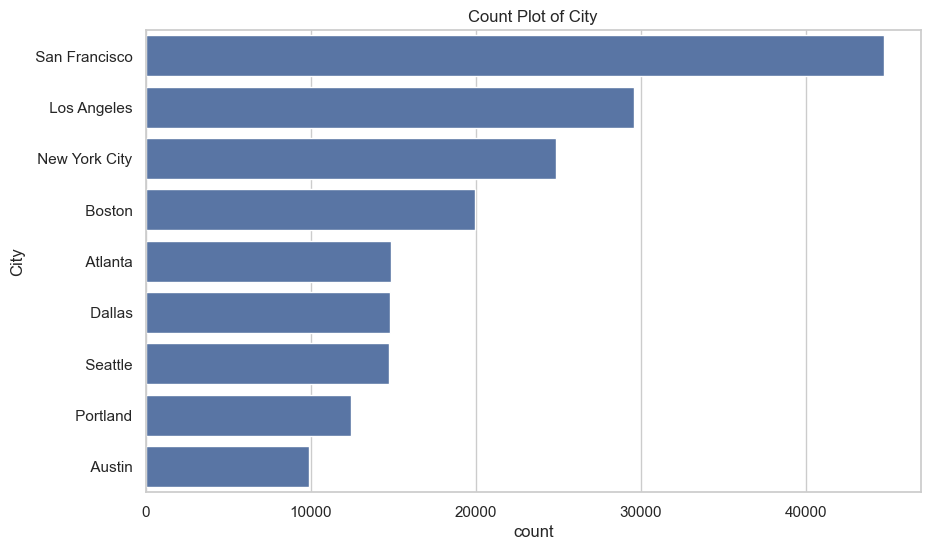

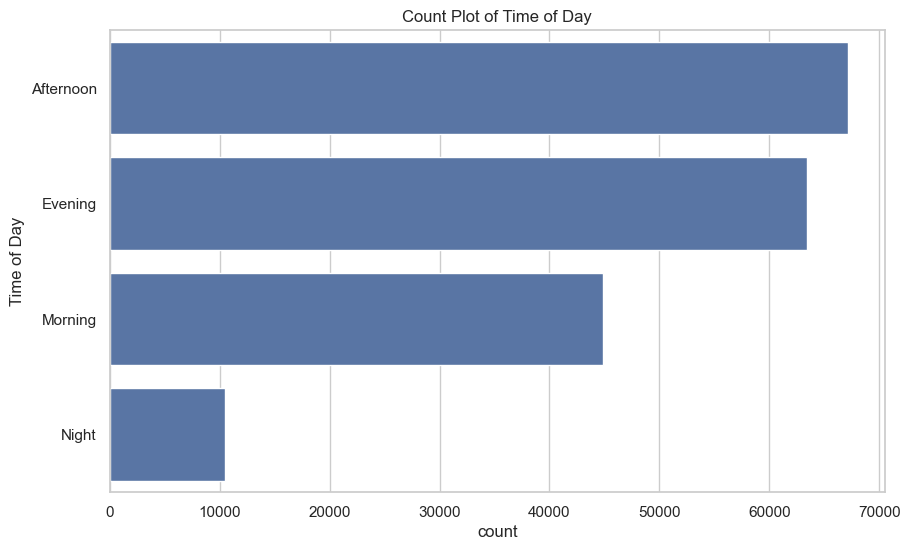

In [23]:
# Count plots for categorical columns
categorical_columns = ['Product Category', 'Product', 'City', 'Time of Day']
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df[column], order=df[column].value_counts().index)
    plt.title(f'Count Plot of {column}')
    plt.show()

### Bivariate Analysis

Bivariate analysis involves examining the relationship between two columns.

1. **Correlation Matrix**: Heatmap to see the correlation between numerical features.
2. **Scatter Plots**: For pairs of numerical columns.
3. **Box Plots**: For numerical vs. categorical columns.

In [24]:
corr_matrix = df.select_dtypes(include=['number']).corr()
corr_matrix

Order ID  Quantity Ordered  Price Each     Month     Sales  \
Order ID          1.000000          0.000702   -0.002857  0.993063 -0.002949   
Quantity Ordered  0.000702          1.000000   -0.148272  0.000791 -0.139417   
Price Each       -0.002857         -0.148272    1.000000 -0.003375  0.999203   
Month             0.993063          0.000791   -0.003375  1.000000 -0.003466   
Sales            -0.002949         -0.139417    0.999203 -0.003466  1.000000   
Hour              0.001175         -0.002218    0.001721  0.001731  0.001668   

                      Hour  
Order ID          0.001175  
Quantity Ordered -0.002218  
Price Each        0.001721  
Month             0.001731  
Sales             0.001668  
Hour              1.000000

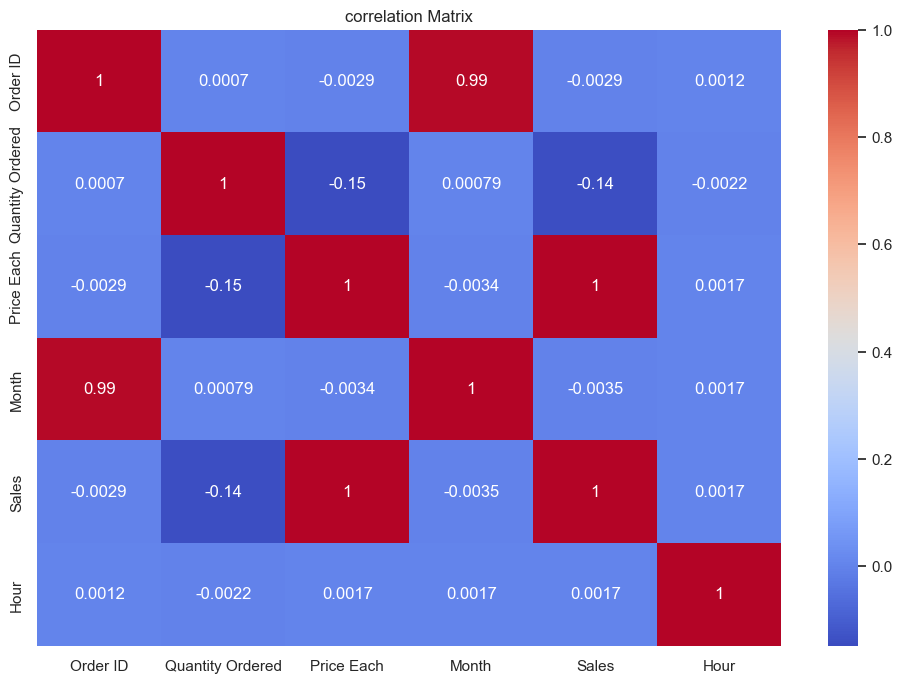

In [25]:
# correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('correlation Matrix')
plt.show()


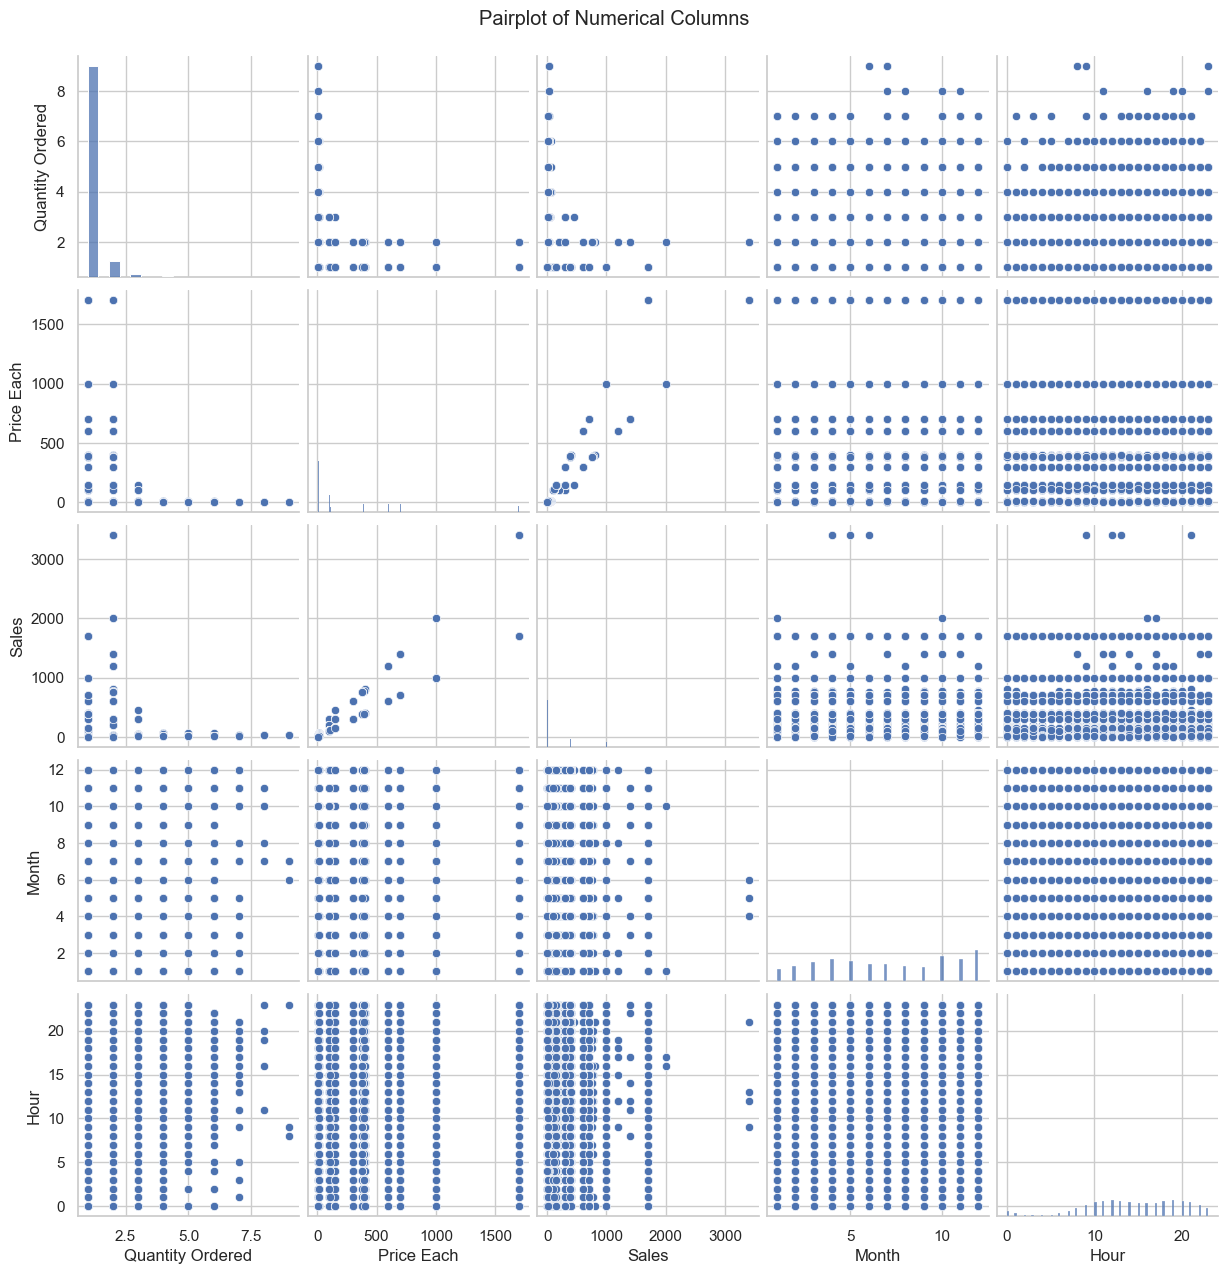

In [26]:
# scatter plots for pairs of numerical columns
sns.pairplot(df[numerical_columns])
plt.suptitle('Pairplot of Numerical Columns', y=1.02)
plt.show()

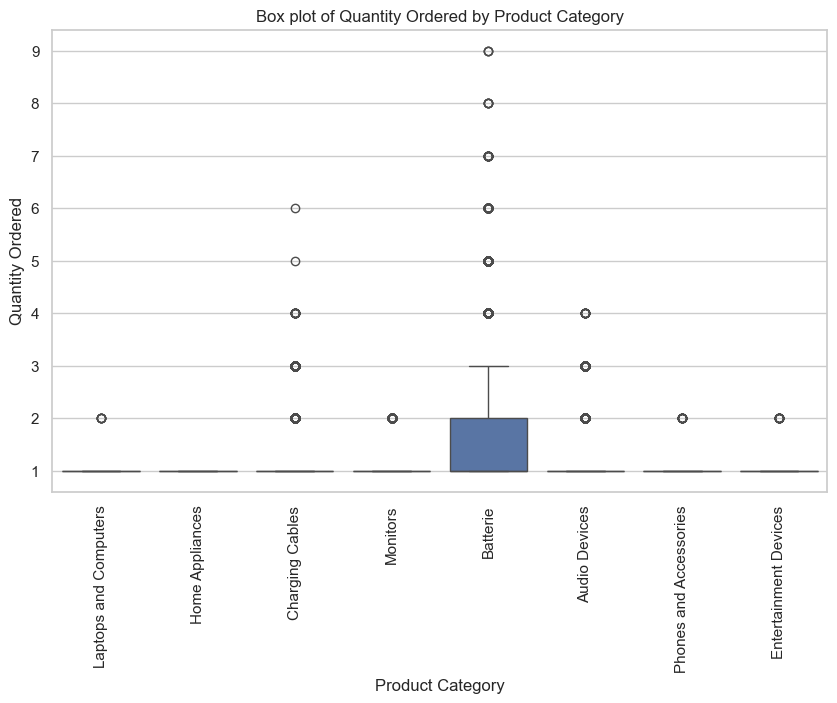

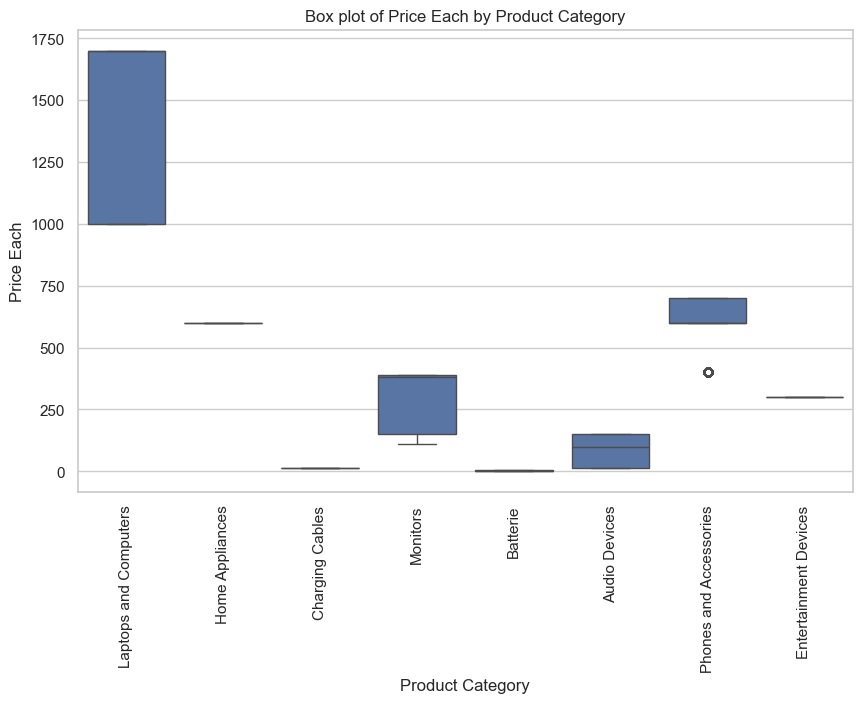

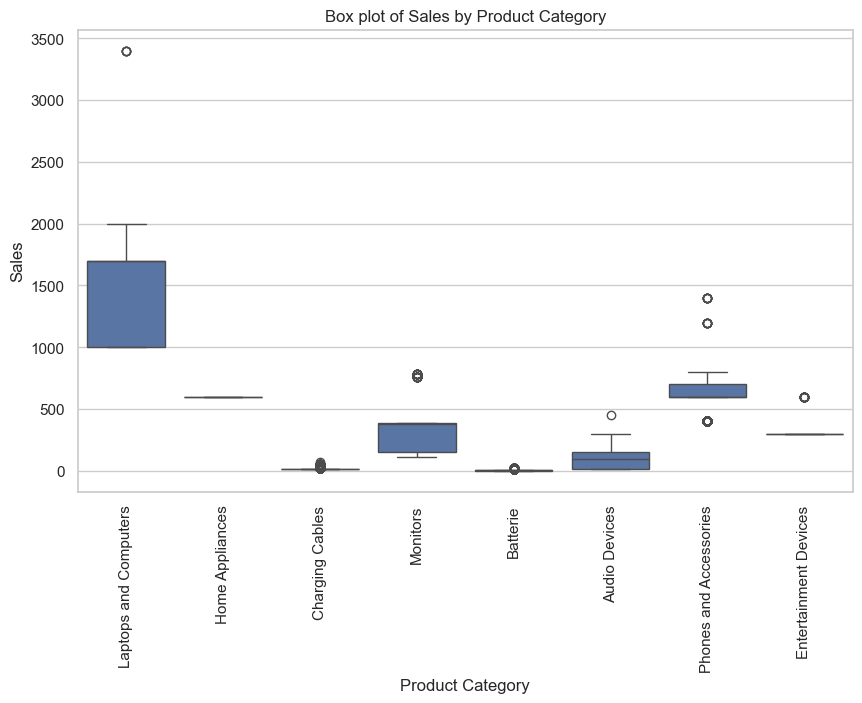

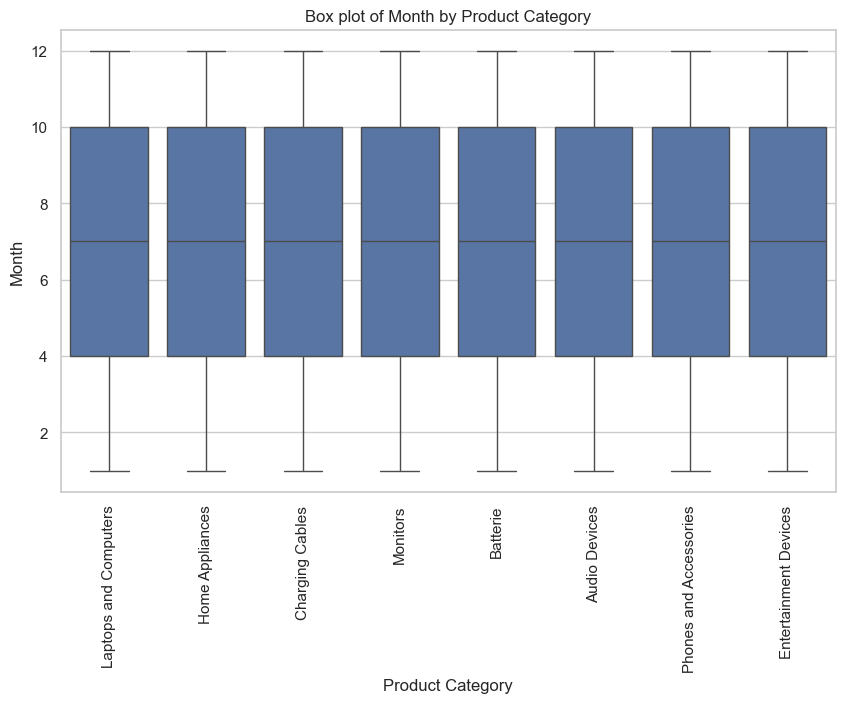

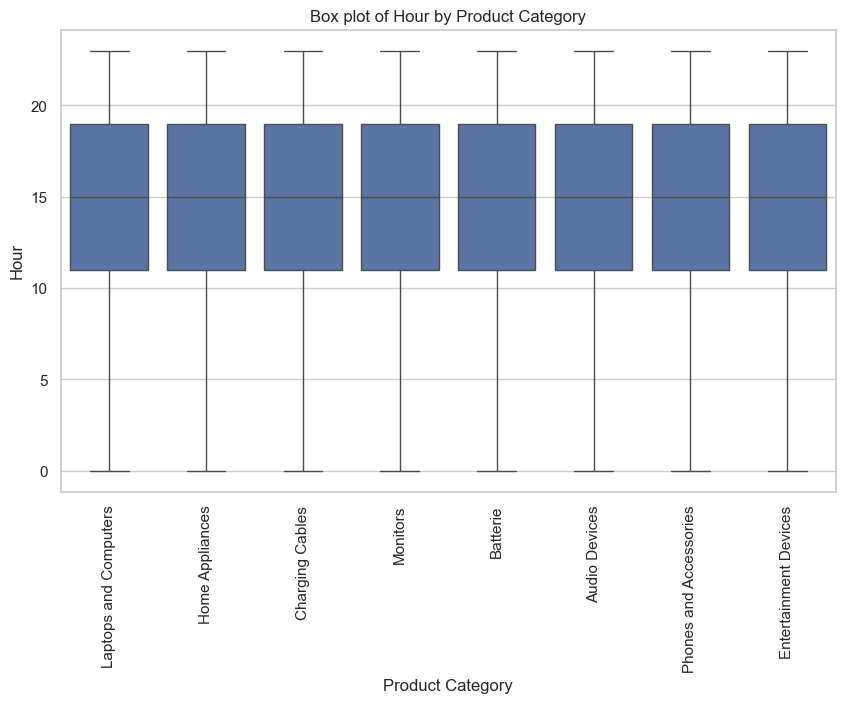

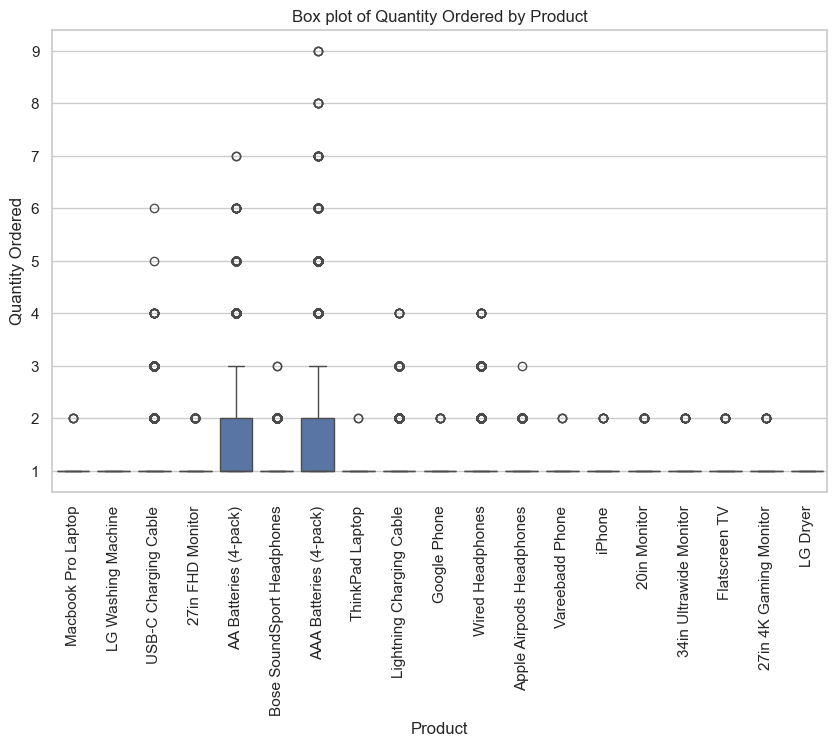

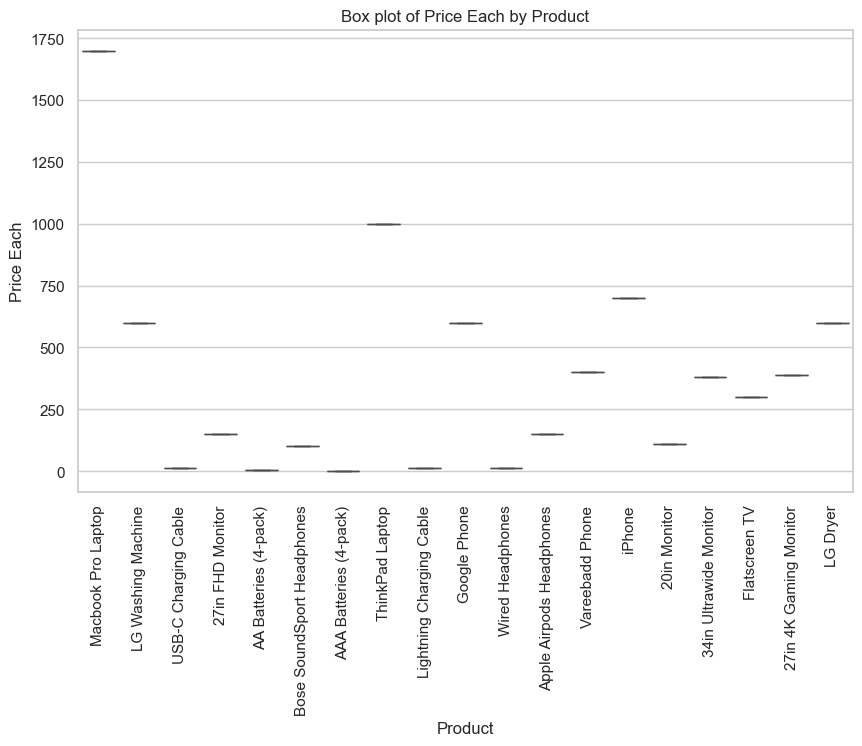

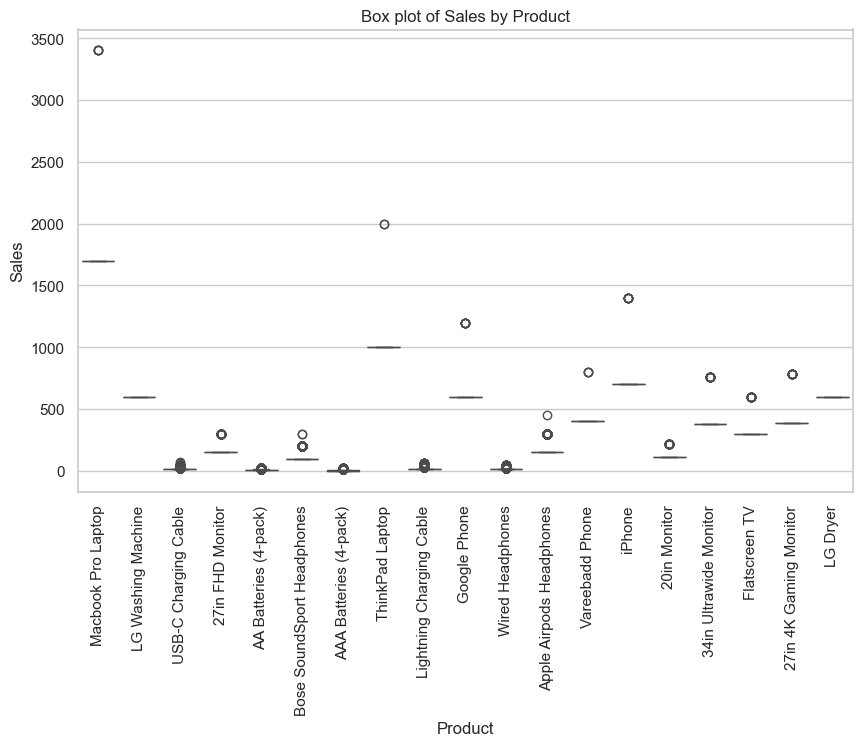

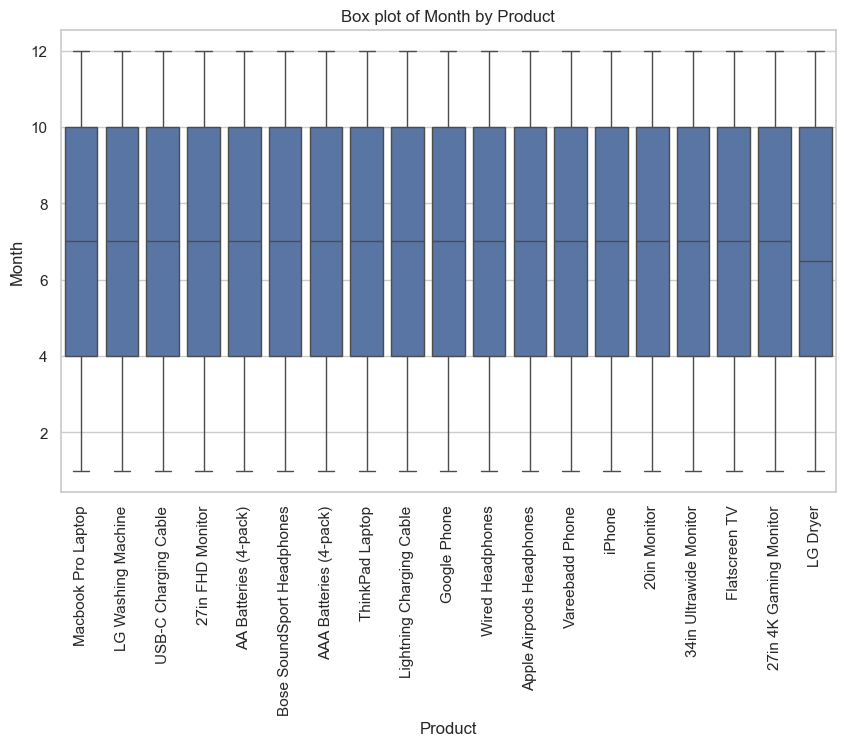

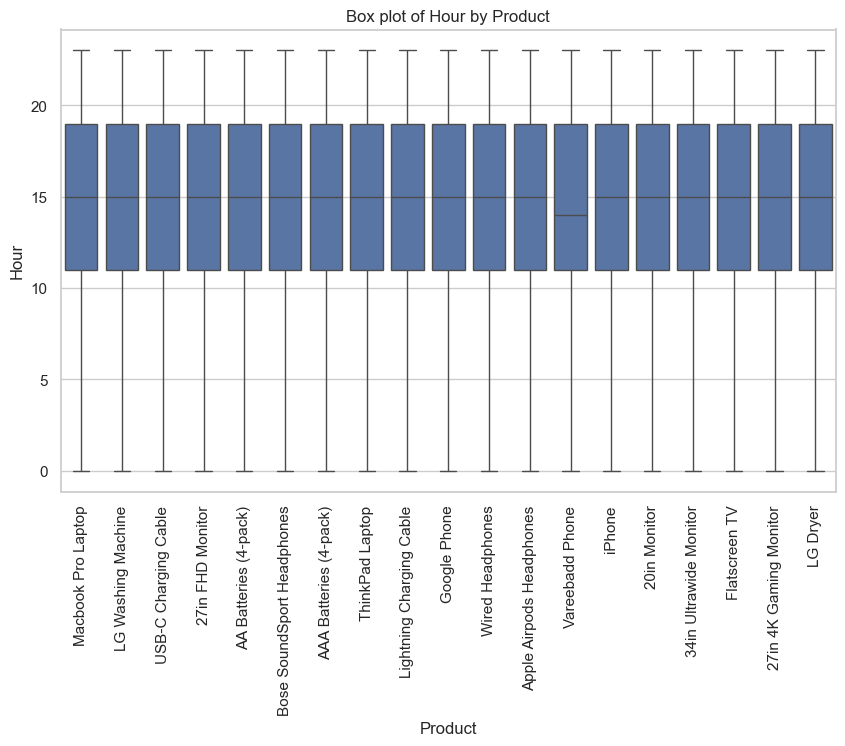

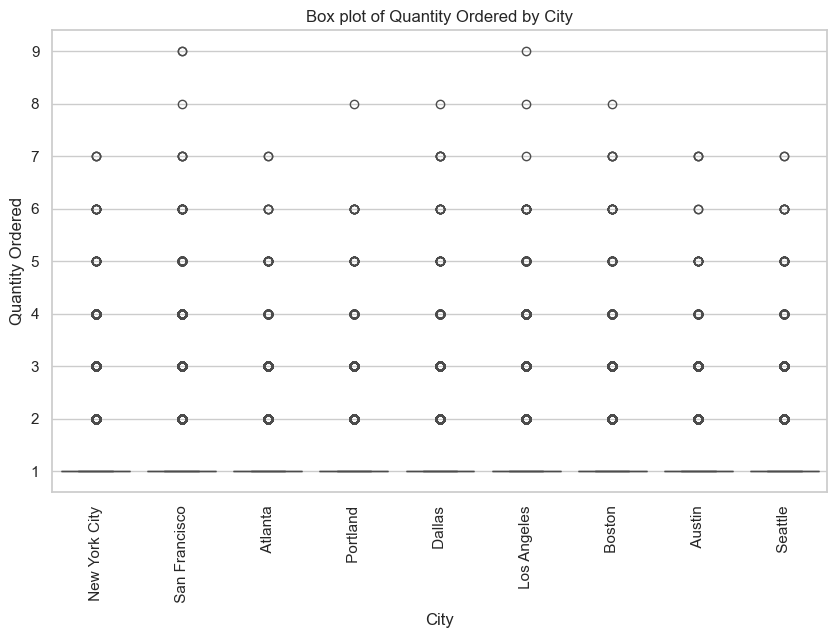

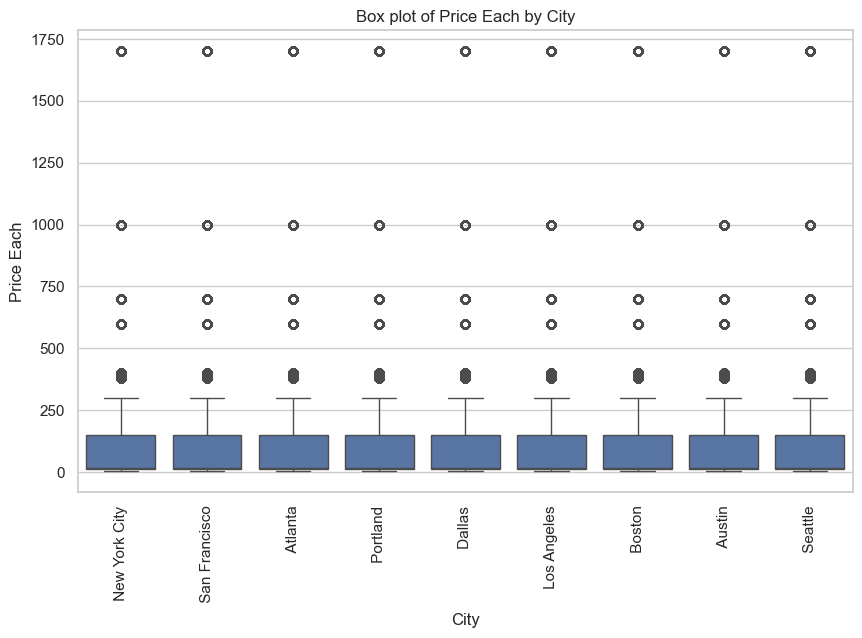

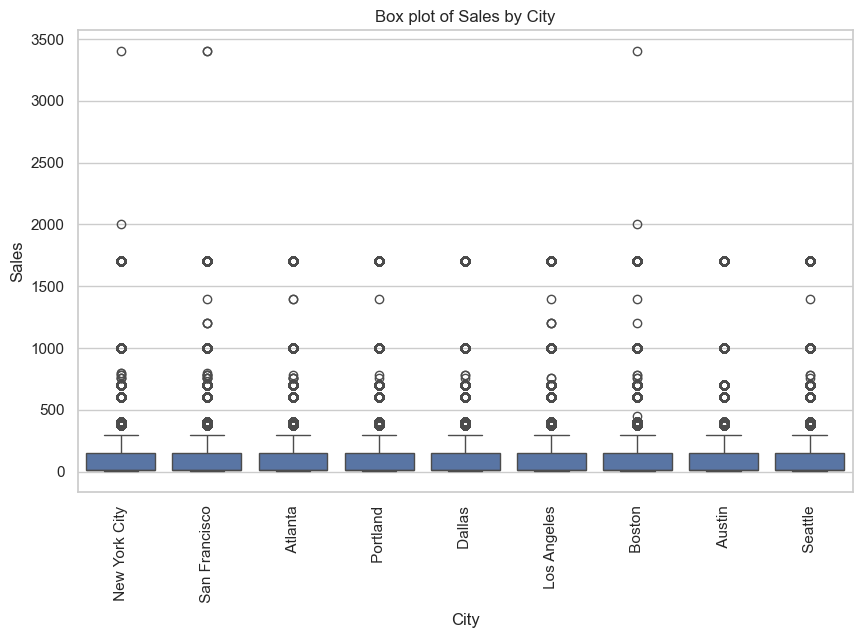

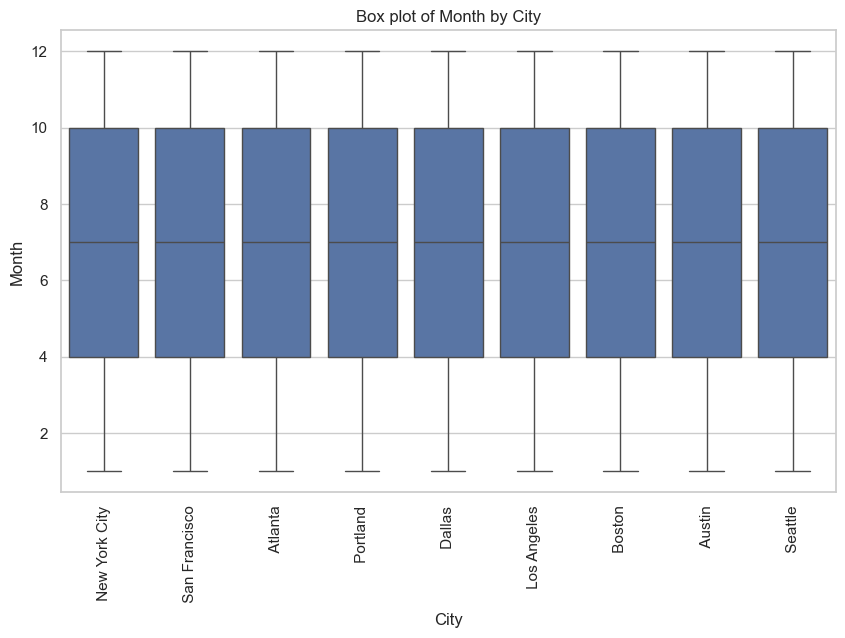

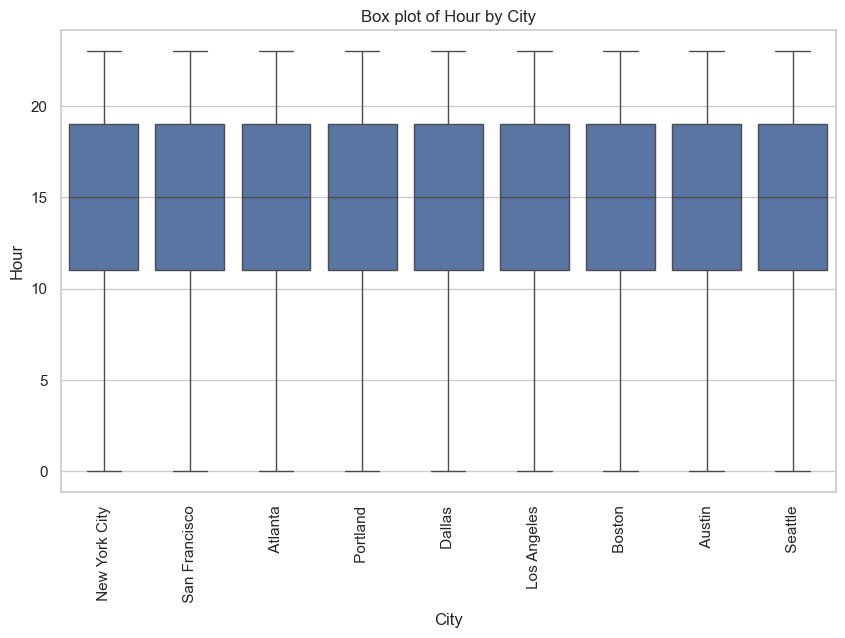

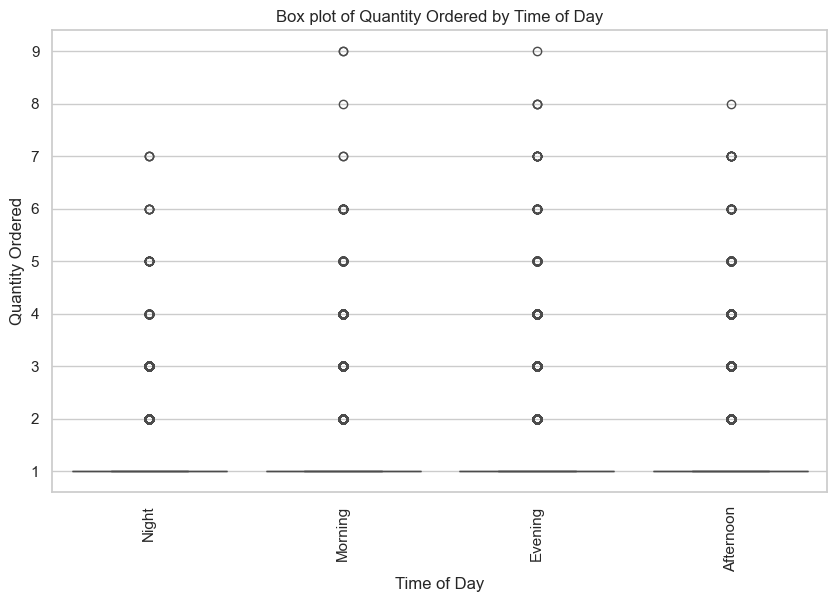

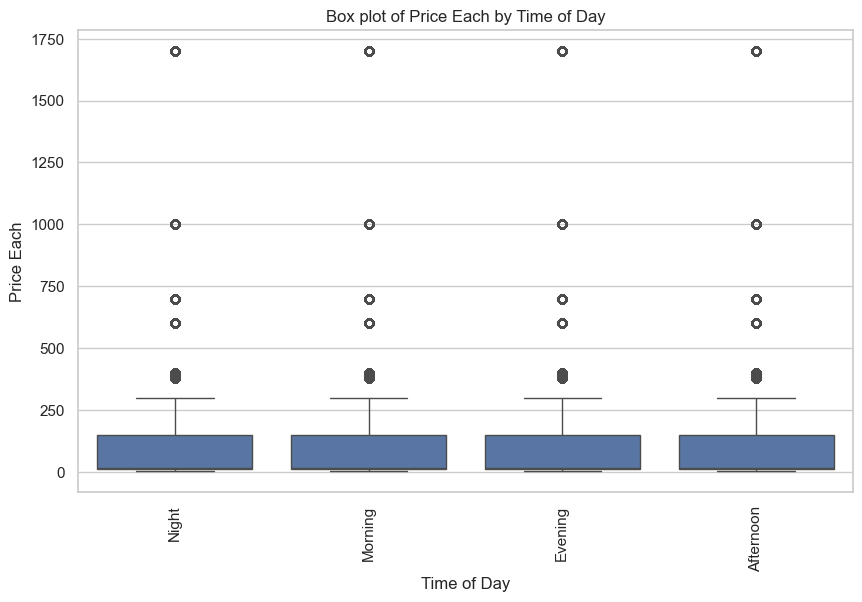

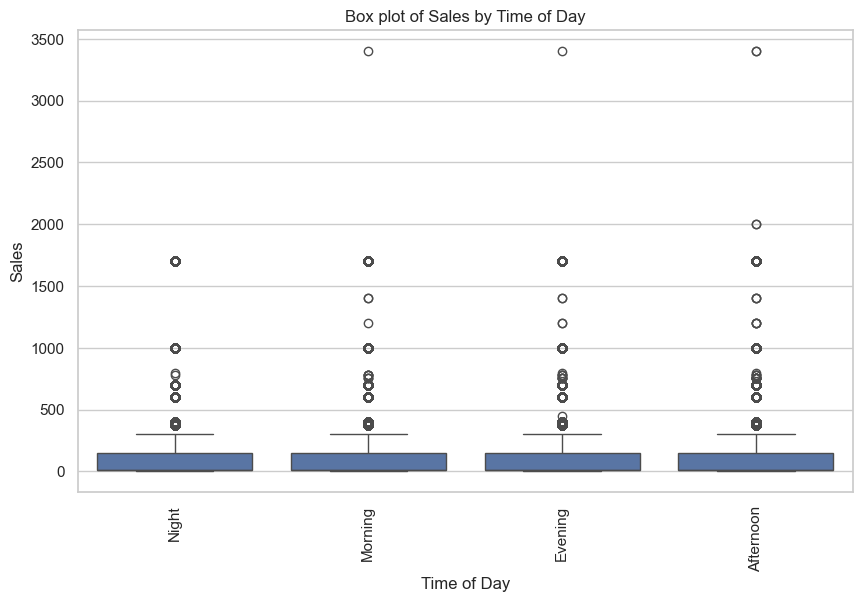

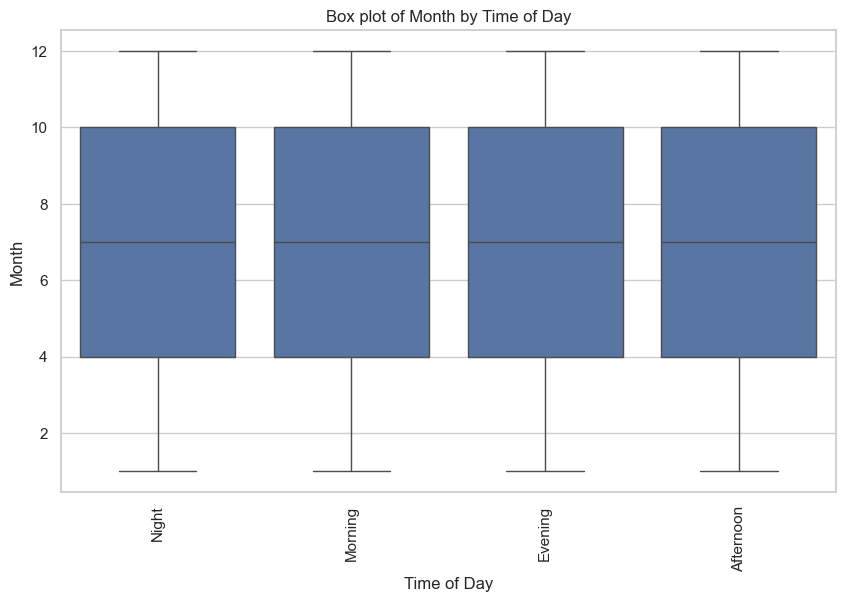

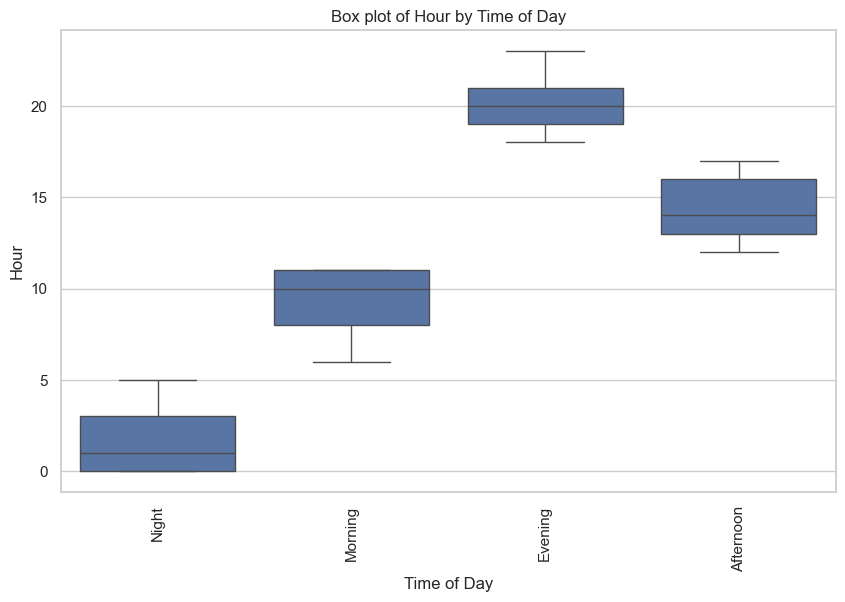

In [33]:
# Box plots for numerical vs categorical columns
for cat_column in categorical_columns:
    for num_column in numerical_columns:
        plt.figure(figsize=(10,6))
        sns.boxplot(x=cat_column, y=num_column, data=df)
        plt.title(f'Box plot of {num_column} by {cat_column}')
        plt.xticks(rotation=90)
        plt.show()

## Multivariate Analysis

Multivariate analysis involves examining relationships among three or more columns simultaneously.

1. **Pair Plot**: With a hue for categorical data.
   
3. **FacetGrid**: For conditional distributions.

4. **Heatmaps**: For interaction between multiple features.

In [28]:
df_sample.select_dtypes(include=['object']).head(3)

Product Category                 Product  \
82095                Monitors  34in Ultrawide Monitor   
77419                Batterie  AAA Batteries (4-pack)   
118628  Entertainment Devices           Flatscreen TV   

                           Purchase Address            City Time of Day  
82095   333 6th St, New York City, NY 10001   New York City   Afternoon  
77419     234 2nd St, Los Angeles, CA 90001     Los Angeles   Afternoon  
118628        498 Main St, Boston, MA 02215          Boston   Afternoon

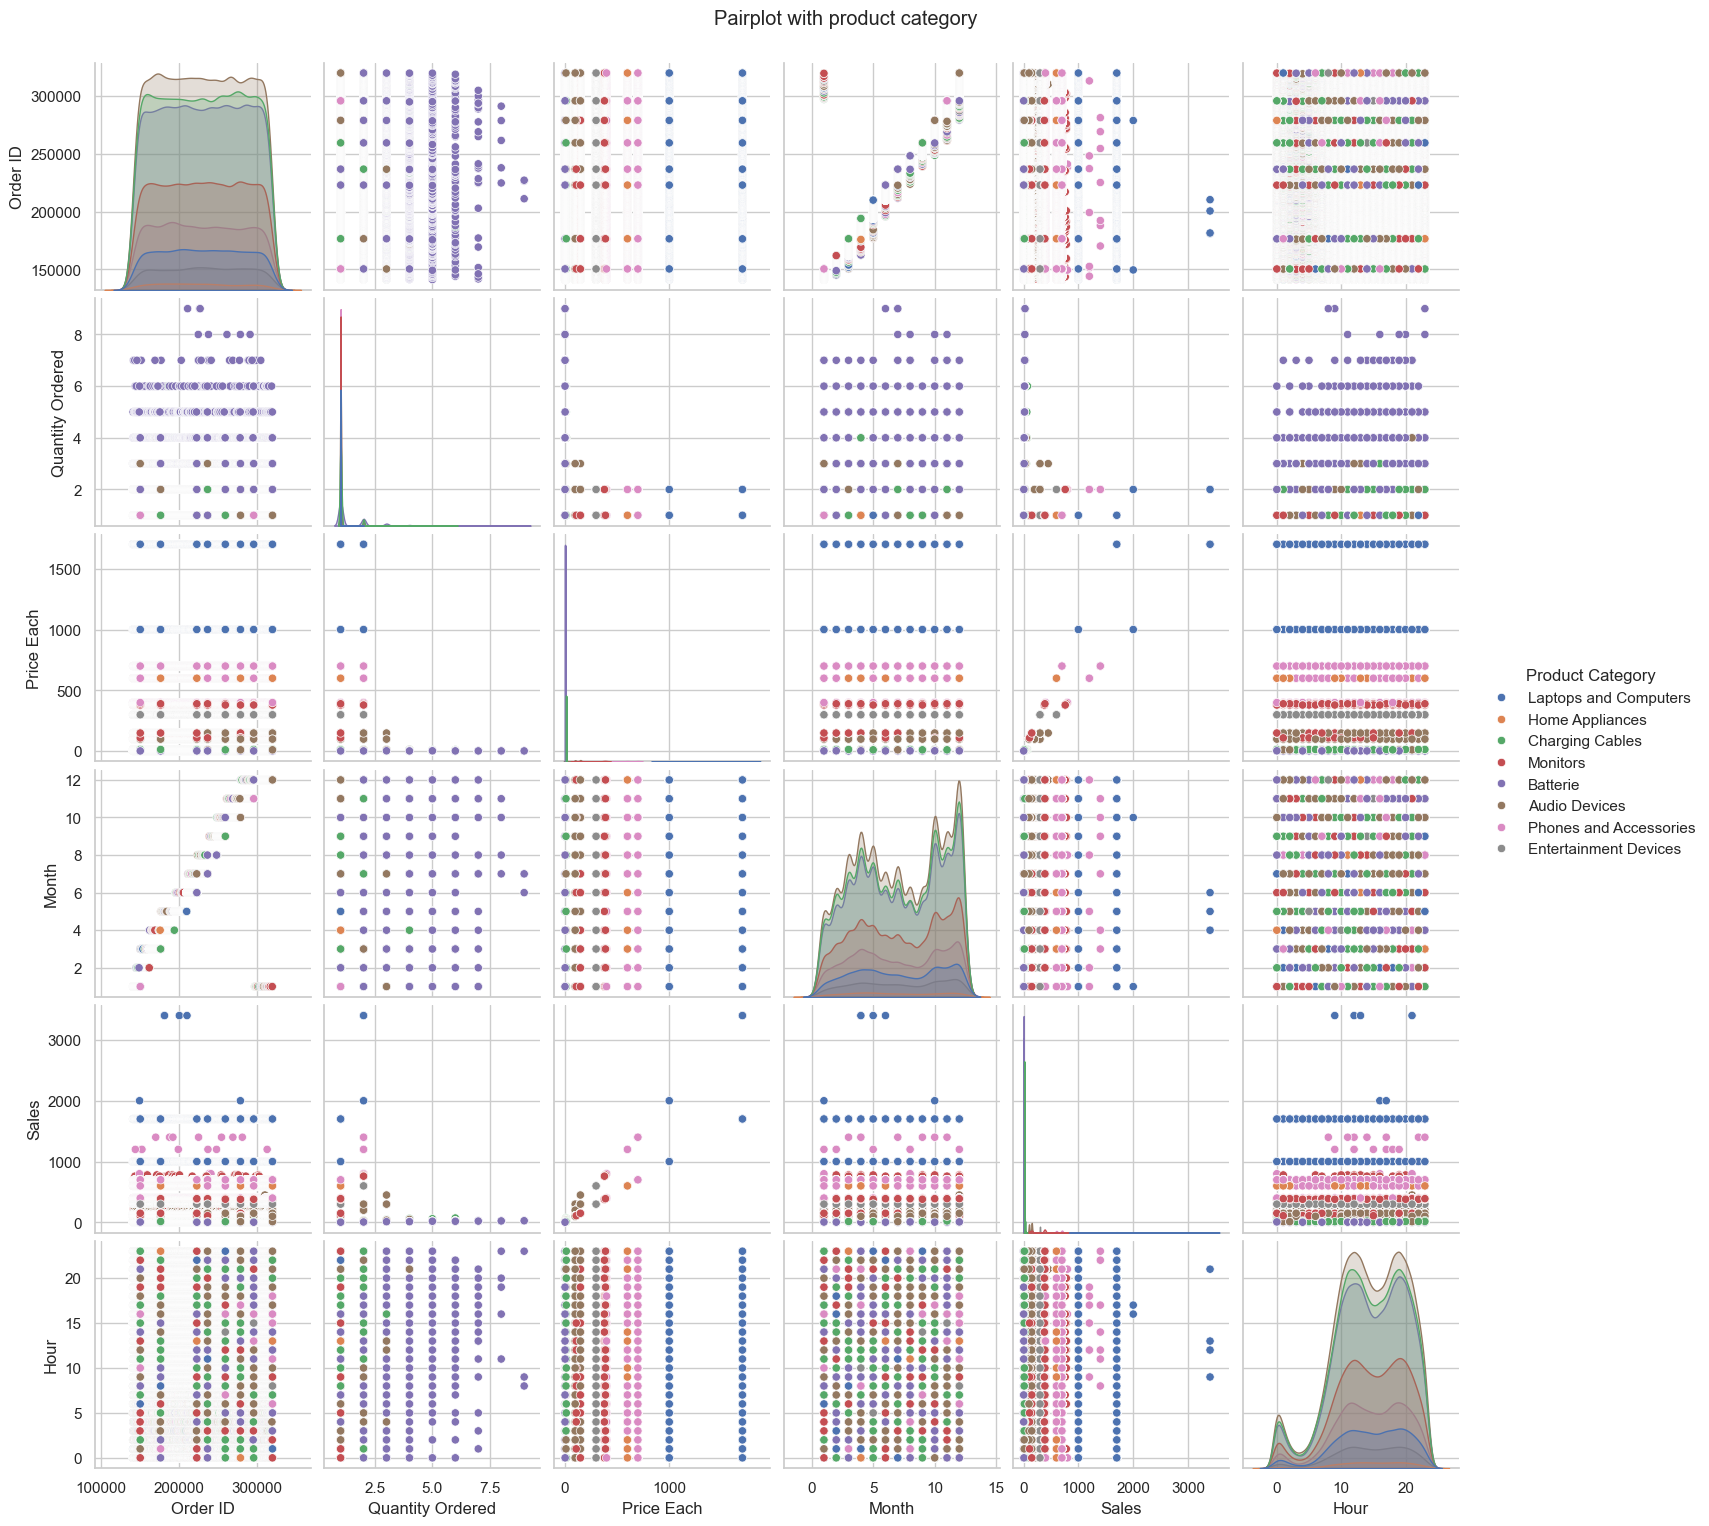

In [29]:
# Pair Pplot with hue for a categorical column
sns.pairplot(df, hue = 'Product Category')
plt.suptitle('Pairplot with product category', y=1.02)
plt.show()

## Product Category Differentiation:

* The coloring by product category helps differentiate how different categories behave with respect to numerical features.

* It provides insights into whether certain numerical features are good discriminators for product categories.

By examining these pair plots, we can derive valuable insights into the relationships between features, the influence of product categories, and potential areas for further investigation in our data analysis process.

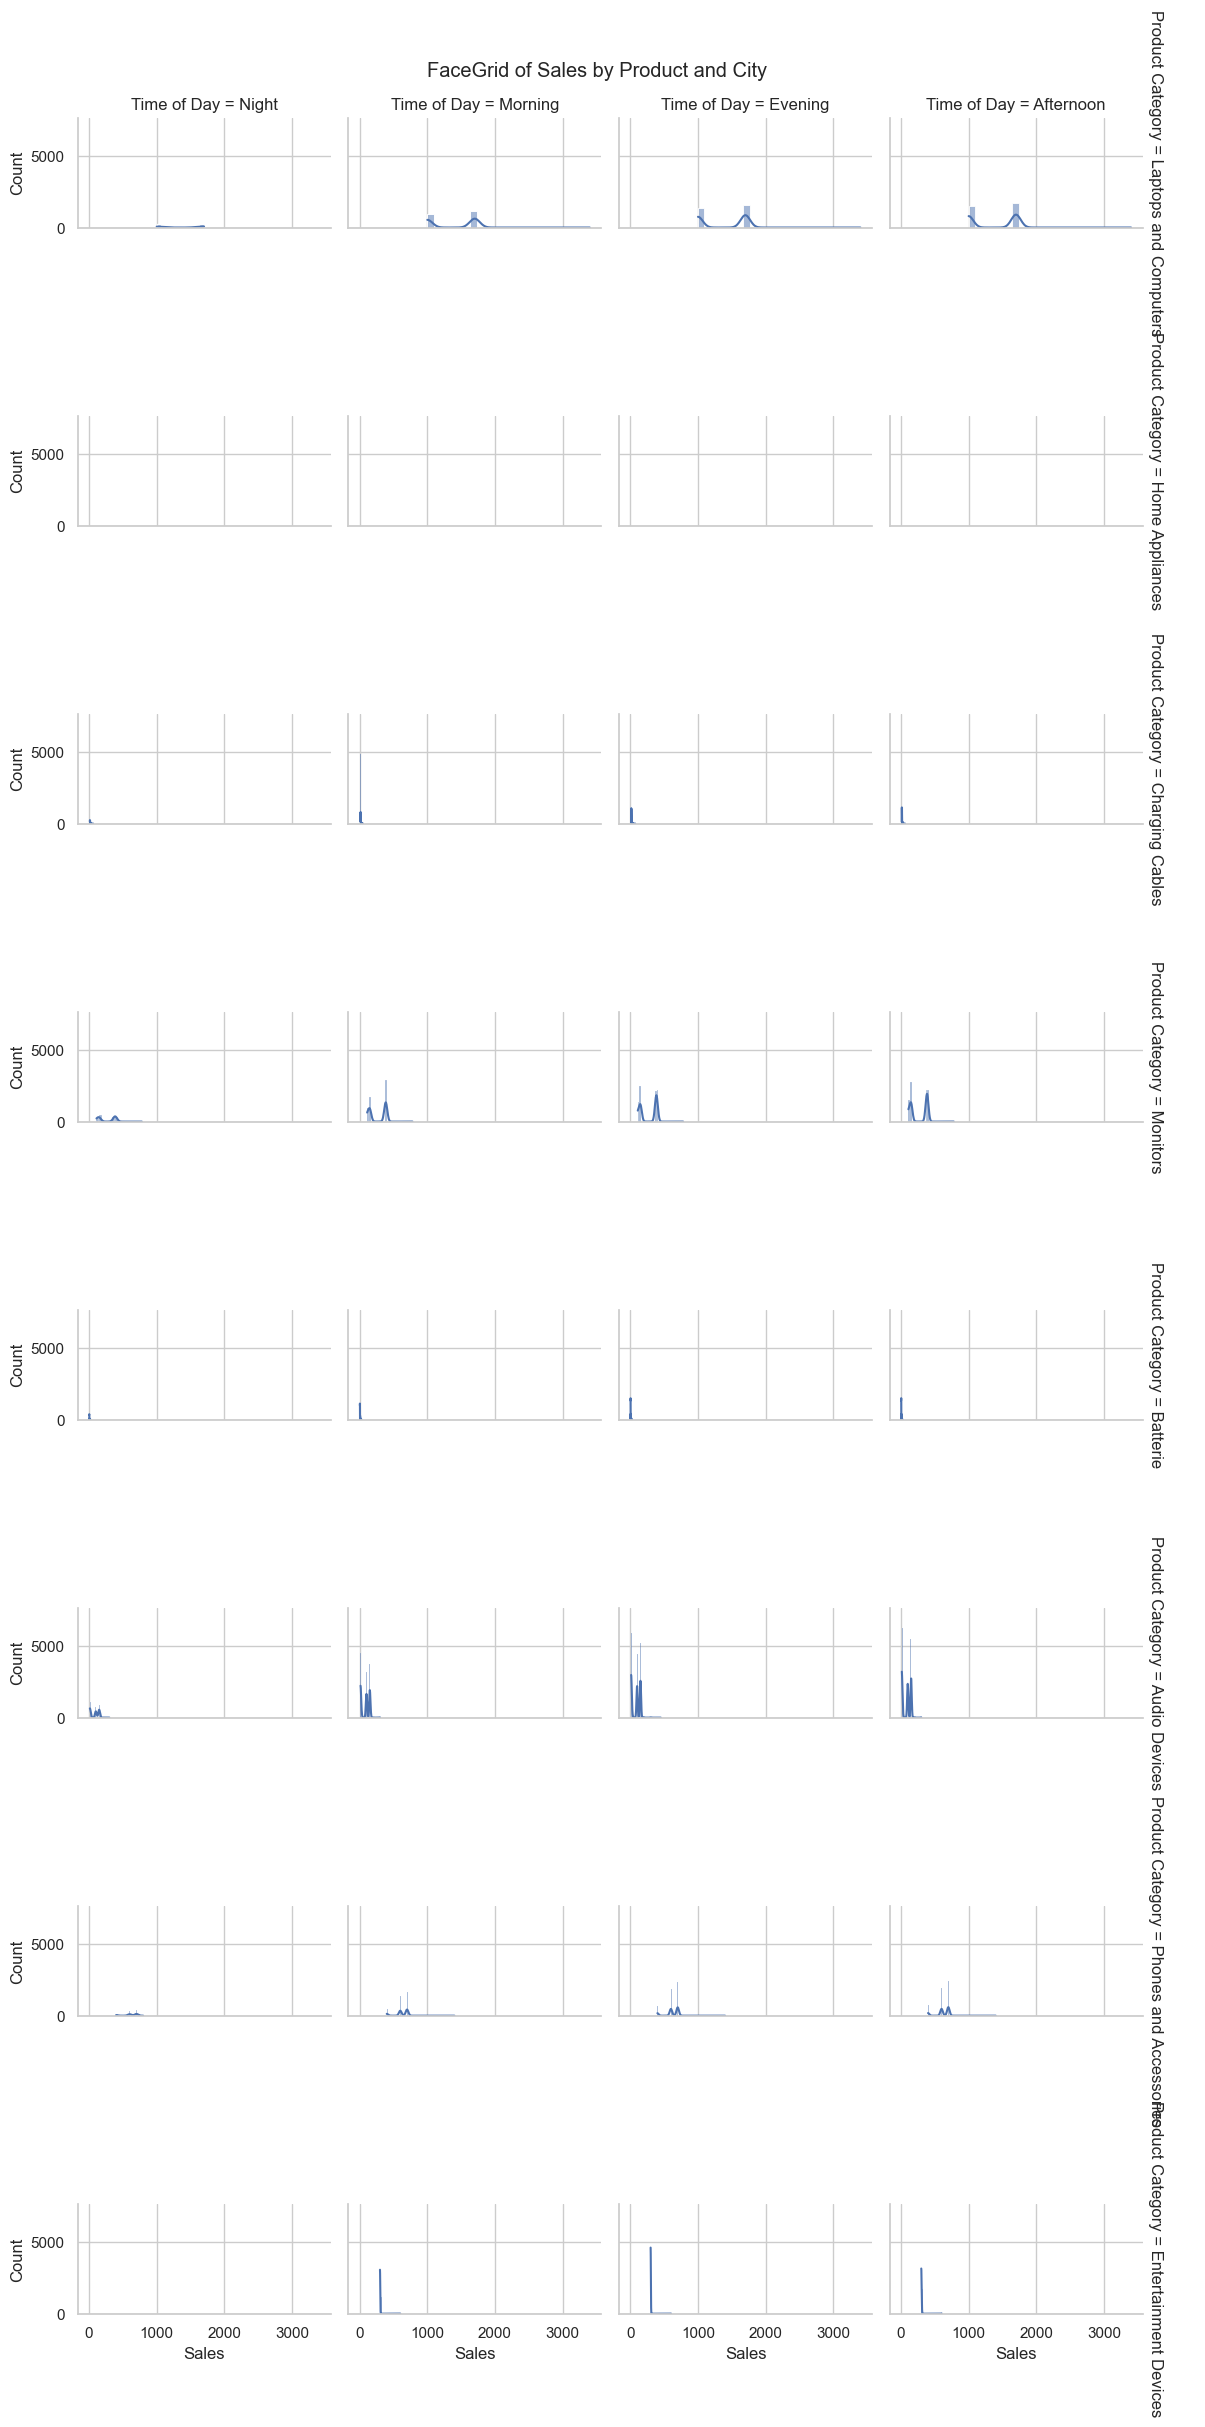

In [32]:
# FaceGrid for conditional Distribution
g = sns.FacetGrid(df, col = 'Time of Day', row='Product Category', margin_titles = True, height=3)
g.map_dataframe(sns.histplot, 'Sales', kde=True)
g.add_legend()
plt.suptitle('FaceGrid of Sales by Product and City')
plt.show()

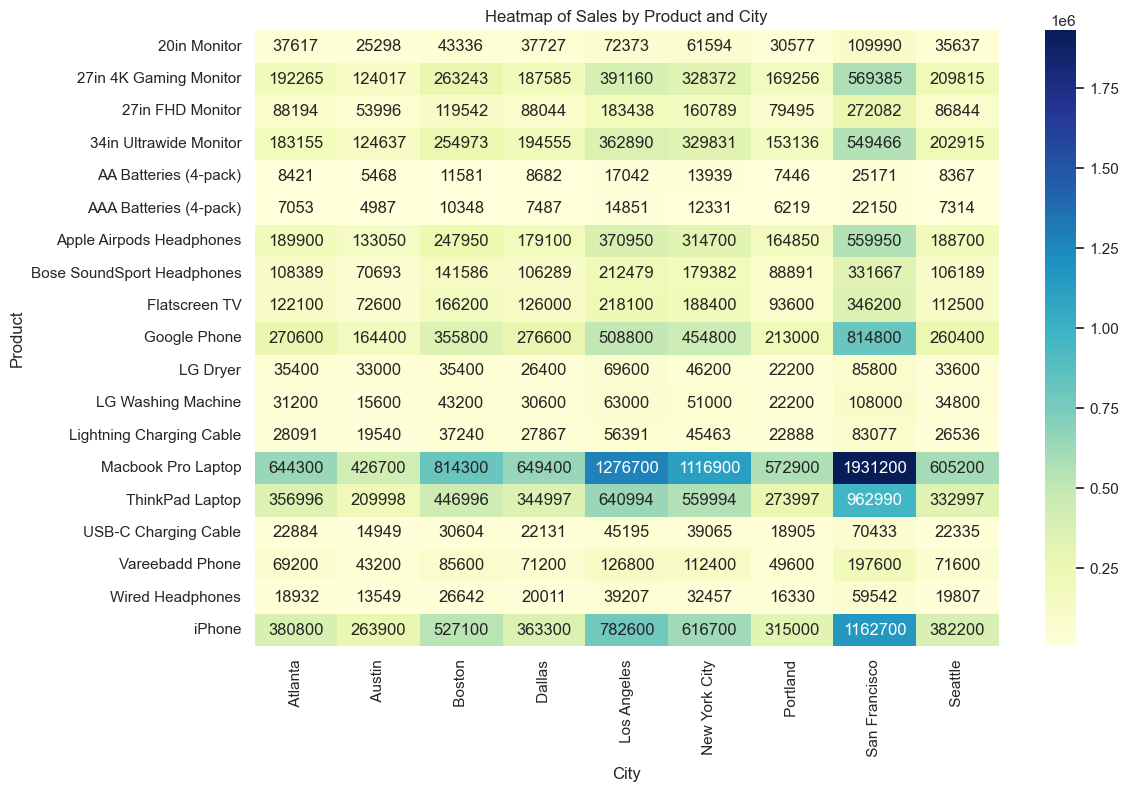

In [31]:
# heatmpa for interaction between multiple features
pivot_table = df.pivot_table(values= 'Sales', index='Product', columns='City', aggfunc = 'sum')
plt.figure(figsize=(12,8))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Heatmap of Sales by Product and City')
plt.show()

# What We Learn from the Above Heatmap

1. **Sales Distribution Across Cities:**

* The heatmap shows how sales are distributed across different products and cities.
  
* By examining the color intensity, we can quickly identify cities where certain products perform well (darker shades) or poorly (lighter shades).

2. **High and Low Performing Products and Cities:**

* Products with consistently high sales across multiple cities can be identified.

* Cities where certain products do not sell well are also easily identifiable.

* This information can be crucial for understanding market trends and making data-driven business decisions.

3. **Comparative Analysis:**

* The heatmap allows for easy comparison between different products within the same city.

* Similarly, it enables comparison of the same product across different cities.

4. **Identifying Patterns and Trends:**

* Patterns such as regional preferences for certain products may emerge.

* Trends over time can be inferred if the data includes a temporal component (e.g., different months or years).


Overall, this heatmap serves as a powerful visualization tool to understand the interaction between sales, products, and cities, enabling more informed strategic decisions based on data.